# Математическая статистика
## Практическое задание 4

В данном задании предлагается провести некоторое исследование доверительных интервалов и байесовких методов.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 4"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2<font size="5" color="red">\*</font> - 3 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 5 баллов
* Задача 5<font size="5" color="red">\*</font> - 2 балла
* Задача 6 - 4 балла
* Задача 7 - 1 балл
* Задача 8 - 3 балла
* Задача 9<font size="5" color="red">\*</font> - 5 баллов
* Задача 10 - 5 баллов
* Задача 11<font size="5" color="red">\*</font> - 3 балла

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import requests
import pandas
from io import StringIO
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
cummean = lambda x:  x.cumsum()/np.arange(1, len(x)+1)
cummax = np.maximum.accumulate
cummedian = lambda sample:np.array([np.median(sample[:n]) for n in range(1, N+1)])
cumvariance = lambda sample: cummean(sample**2) - (cummean(sample))**2

### 1. Доверительные интервалы

**Задача 1.** В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. Чтобы не плодить код, напишите следующую функцию. Пример построения есть в ячейке №22 ноутбука `python_6`.

In [3]:
N = 100
def draw_confidence_interval(left,  # левая граница интервала
                             right,  # правая граница интервала
                             estimation=None,  # если задана, то рисуется график оценки
                             sample=None,  # если задано, то рисуются точки выборки
                             ylim=(None, None)):  # ограничение по оси y
    grid = np.arange(1, N+1)

    plt.figure(figsize=(12, 6))
    if sample is not None:
        plt.scatter(grid, sample, alpha=0.2, s=40, label='Выборка')
    if estimation is not None:
        plt.plot(grid, estimation, color='red', linewidth=2.5, label='Оценка')
    plt.fill_between(grid, left, right, alpha=0.15, label='Доверительный интервал')
    plt.legend()
    plt.ylim(ylim) 
    plt.grid()
    plt.show()
    
def count_misses(left, right, expected):
    misses = ((right-expected < 0) | (expected-left<0)).sum()
    print("%d%% промахов"%(misses/len(left)*100))

Сгенерируйте выборки и постройте графики доверительных интервалов по следующей схеме.
* Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.
* Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.
* Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.
* Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.


Генерировать выборки размера 100, уровень доверия брать $\alpha=0.95$. Для вычисления квантилей у каждого распределения из `scipy.stats` есть функция `ppf`.

Сделайте вывод. Насколько часто истинное значение параметра попадает в доверительный интервал? Как длина интервала зависит от размера выборки?

* Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

$$\left( \overline{X} - \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} , \overline{X} + \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \right)$$

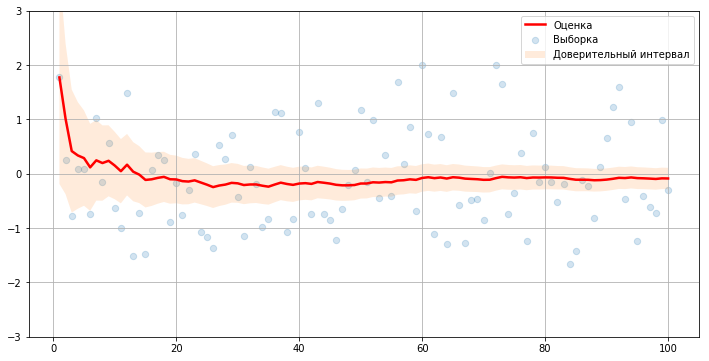

0% промахов


In [8]:
alpha = 0.95
sample = sps.norm(loc=0, scale=1).rvs(size=N)
sample_cummean = cummean(sample)
addendum = sps.norm.ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, len(sample)+1))
left = sample_cummean - addendum
right = sample_cummean + addendum
draw_confidence_interval(left, right, estimation=sample_cummean, sample=sample, ylim=(-3, 3))
count_misses(left, right, 0)

* Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.

$$\left( X_{(n)}, \dfrac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right)$$

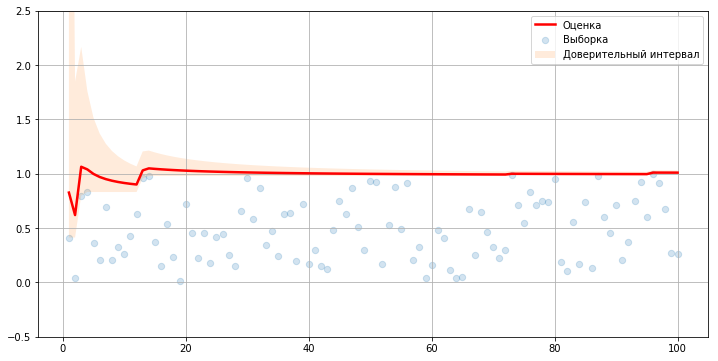

0% промахов


In [9]:
sample = sps.uniform.rvs(size=N)
sample_cummax = cummax(sample)
left = sample_cummax
right = sample_cummax / (1 - alpha) ** (1 / np.arange(1, N+1))
draw_confidence_interval(left, right, sample=sample, 
                         estimation=np.arange(2,N+2)/np.arange(1,N+1)*sample_cummax, ylim=(-0.5, 2.5))
count_misses(left, right, 1)

* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.

$$\left( 
\dfrac{\lambda}{\overline{X}} + \dfrac{\sqrt{\lambda} z_{\frac{1 - \alpha}{2}}}{\overline{X} \sqrt{n}}, 
\dfrac{\lambda}{\overline{X}} + \dfrac{\sqrt{\lambda} z_{\frac{1 + \alpha}{2}}}{\overline{X} \sqrt{n}} \right),$$ где $\lambda = 2$

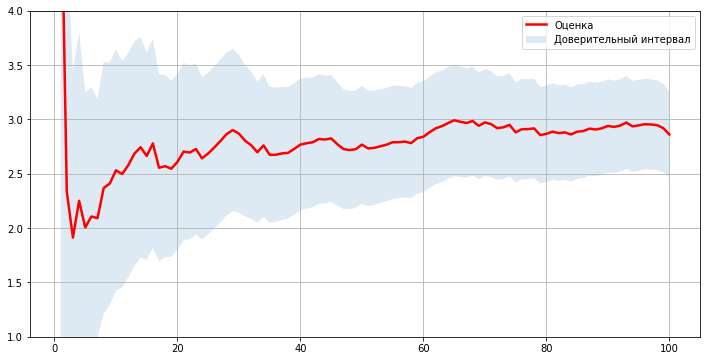

0% промахов


In [6]:
sample = sps.gamma(a=2, scale=1/3).rvs(size=N)
sample_cummean = cummean(sample)
left = 2 / sample_cummean + (sps.norm.ppf((1 - alpha)/2)*np.sqrt(2)) / (sample_cummean*np.sqrt(np.arange(1, N+1)))
right = 2 / sample_cummean + (sps.norm.ppf((1 + alpha)/2)*np.sqrt(2)) / (sample_cummean*np.sqrt(np.arange(1, N+1)))
draw_confidence_interval(left, right, estimation=2/sample_cummean, ylim=(1, 4))
count_misses(left, right, 3)

* Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.

$$\left( \hat{\mu} - \pi\dfrac{z_{\frac{1 + \alpha}{2}}}{2\sqrt{n}} , \hat{\mu} - \pi\dfrac{z_{\frac{1 - \alpha}{2}}}{2\sqrt{n}} \right)$$

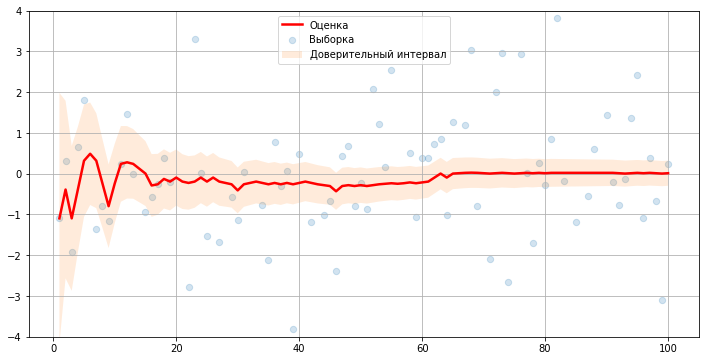

0% промахов


In [7]:
sample = sps.cauchy.rvs(size=N)
sample_cummedian = cummedian(sample)
left = sample_cummedian - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(np.arange(1, N+1)))
right = sample_cummedian - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(np.arange(1, N+1)))
draw_confidence_interval(left, right, sample=sample, estimation=sample_cummedian, ylim=(-4, 4))
count_misses(left, right, 0)

* Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

$$\left( \hat{\mu} - \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} , \hat{\mu} + \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \right)$$

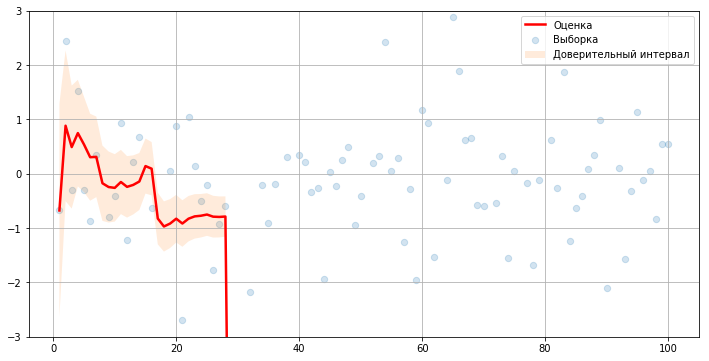

84% промахов


In [10]:
sample = sps.cauchy.rvs(size=N)
sample_cummedian = cummean(sample)
addendum = sps.norm.ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, len(sample)+1))
left = sample_cummedian-addendum
right = sample_cummedian+addendum
draw_confidence_interval(left, right, sample=sample, estimation=cummean(sample),ylim=(-3, 3))
count_misses(left, right, 0)

**Вывод:** Истинное значение параметры почти всегда попадает в доверительный интервал (по крайней мере на наших выборках). С ростом выборки длина доверительного интервала уменьшается, то есть повышается точность предсказывания. Если неправильно угадать распределение (как в последнем пункте), то интервал будет очень плохим.

**Задача 2<font size="5" color="red">\*</font>.** 
Аналогично заданию 1 постройте доверительные интервалы для следующих случаев
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

**Задача 3<font size="5" color="red">\*</font>.** 
Сгенерируйте выборку размера 200 из распределения $\mathcal{N}((0, 0)^T, ((2, 1)^T, (1, 3)^T))$. Постройте точную доверительную область для $\theta$ в модели $\mathcal{N}(\theta, ((2, 1)^T, (1, 3)^T))$. Нанесите на график точки выборки.

**Задача 4.** 
При использовании асимптотических доверительных интервалов важно понимать, какой размер выборки является достаточным для хорошего приближения. Иначе говоря, пусть $\xi_n \xrightarrow{d} \mathcal{N}(0, 1)$. Начиная с какого $n$ распределение статистики $\xi_n$ хорошо приближается нормальным распределением?

Для ответа на этот вопрос проведите следующее исследование. Сгенерируйте $K=10^5$ выборок $(X_{i,k},\ i \leqslant N)$ размера $N=300$, где $k \leqslant K$ --- номер выборки. Для каждой подвыборки $k$-ой выборки $(X_{i,k},\ i \leqslant n)$ посчитайте значение статистики $T_{n,k}$ (определение далее) для всех $n \leqslant N$. Далее для каждого фиксированного $n$ постройте эмпирическую функцию распределения $F_n^*$ по выборке $(T_{n,k}, k \leqslant K)$ и посчитайте точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|,$ где $F$ --- функция распределения $\mathcal{N}(0, 1)$ (см. задачу 4 задания 1). Постройте график зависимости $D_n$ от $n$.

Рассмотрите следующие случаи
* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.
* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.
* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

В первых двух пунктах нужно построить две зависимости на одном графике для сравнения. Масштаб графика должен быть таким, чтобы четко можно было увидеть различие между двумя статистиками. Например, поставьте ограничение сверху по оси $y$ на 0.05. Незабудьте добавить сетку и легенду.

Старайтесь не копировать много кода, пишите вспомогательные функции. Обратите внимание, что оптимальный код для первых двух пунктов выполняется за 30 секунд, для третьего --- за 3 минуты. Неоптимальный код может выполняться более часа.

Сделайте вывод о том, в каком случае распределение статистики быстрее приближается нормальным распределением. Начиная с какого размера выборки можно пользоваться приближением нормальным распределением?

In [11]:
K = 10**5
N = 300

def getT_nk(T, samples):
    return np.apply_along_axis(T, 1, samples)

def getD_n(samples, distribution, log_verbosity_num=10):
    # Считаем статистику D
    Dn = np.zeros(len(samples.T),dtype=np.float64)
    for n, sample in enumerate(samples.T):
        discontinuities = sorted(sample)

        ecdf = ECDF(discontinuities)
        ecdf_values_right = ecdf(discontinuities)
        ecdf_values_left = np.insert(ecdf_values_right[:-1], 0, [0])

        cdf_values = sps.norm.cdf(discontinuities)

        max_right = np.max(np.abs(cdf_values-ecdf_values_right))
        max_left = np.max(np.abs(cdf_values-ecdf_values_left))

        Dn[n] = max(max_left, max_right)
        if n%log_verbosity_num == 0:
            print(n//log_verbosity_num, end=' ')
    print()
    return Dn

def getD(distribution, T_nks=None, Ts=None):
    if T_nks is None and Ts is None:
        raise Exception("One of paraneters must not be None")
    if T_nks is not None and Ts is not None:
        raise Exception("Only one of paraneters must not be None")
    D = []
    samples = distribution.rvs(size=(K, N))
    print("Sample generated")
    Tcurs = T_nks if T_nks is not None else Ts
    for i, (T, label) in enumerate(Tcurs):
        print("T_%d:"%i, end=' ')
        Tcur = None
        if T_nks is not None:
            Tcur = T(samples)
        else: 
            Tcur = getT_nk(T, samples)
        print(Tcur.shape)
        print("T_%d generated"%i)
        print("D_%d:"%i, end=' ')
        Dcur = getD_n(Tcur, distribution)
        D.append((Dcur, label))
    return D

def plot_results(D, ylim=(0,0.05)):
    
    grid = np.arange(1, N+1)
    plt.figure(figsize=(15, 6))

    for Dcur, label in D:
        plt.plot(grid, Dcur, label=label)
        
    plt.legend()
    plt.ylim(ylim)
    plt.grid(ls=':')
    plt.show()

In [12]:
%%time
D = getD(sps.norm, Ts=
        [(lambda sample: np.sqrt(np.arange(1, len(sample)+1))*cummean(sample), 
          "$\\sqrt{n} \\cdot \\overline{X}$"), 
         (lambda sample: np.sqrt(np.arange(1, len(sample)+1))*cummean(sample) / np.sqrt(cumvariance(sample)),
          "$\\sqrt{n} \\cdot \\overline{X} \\left/ \\sqrt{S^2} \\right.$")])

Sample generated
T_0: (100000, 300)
T_0 generated
D_0: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
T_1: 

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


(100000, 300)
T_1 generated
D_1: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
CPU times: user 1min 9s, sys: 443 ms, total: 1min 9s
Wall time: 1min 9s


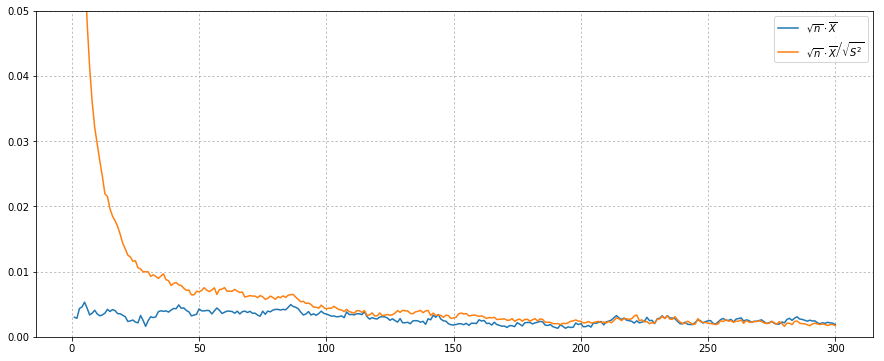

In [13]:
plot_results(D)

In [14]:
%%time
p = 0.5
D = getD(sps.bernoulli(p), Ts=
        [(lambda sample:np.sqrt(np.arange(1, len(sample)+1))*(cummean(sample)-p)/(np.sqrt(p*(1-p))), 
         "$\\sqrt{n} \\frac{\\overline{X} - p}{\\sqrt{p(1-p)}}$"),
         (lambda sample:np.sqrt(np.arange(1, len(sample)+1))*(cummean(sample)-p)/np.sqrt(cumvariance(sample)),
         "$\\sqrt{n} \\frac{\\overline{X} - p}{\\sqrt{S^2}}$")])

Sample generated
T_0: (100000, 300)
T_0 generated
D_0: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
T_1: 

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


(100000, 300)
T_1 generated
D_1: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
CPU times: user 54.8 s, sys: 497 ms, total: 55.3 s
Wall time: 55.3 s


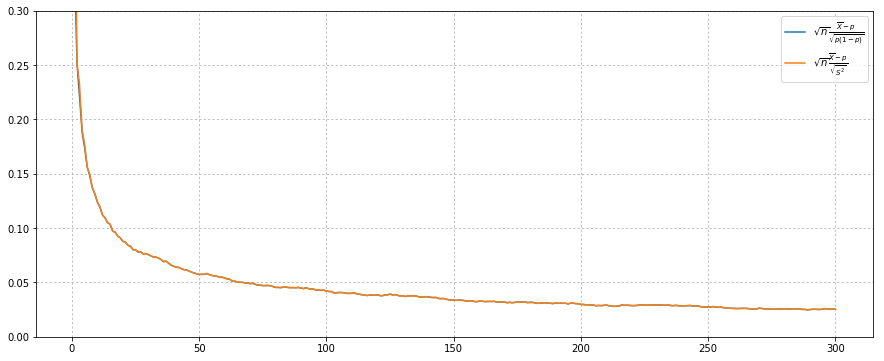

In [15]:
plot_results(D, ylim=(0,0.3))

In [16]:
%%time
D = getD(sps.cauchy, T_nks=
         [(lambda samples: 
            np.array([np.sqrt(n) * np.median(samples[:, :n], axis=1) / (np.pi / 2) for n in range(1, N + 1)]).T,
           "$\\sqrt{n} \\frac{\\widehat{\\mu}}{\\pi/2}$")])

Sample generated
T_0: (100000, 300)
T_0 generated
D_0: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
CPU times: user 1min 41s, sys: 2.77 s, total: 1min 43s
Wall time: 1min 43s


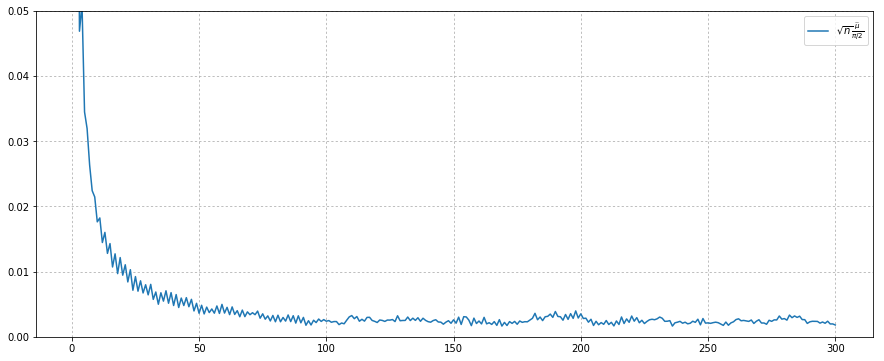

In [17]:
plot_results(D)

**Вывод:** Для нормального и Коши распределение уже на выборке размера 50 хорошо приближается нормальным (значения $D$ меньше $0.01$), для бернуллиевского лишь лучше чем $0.05$ на выборке размера 300. Но при увеличении размера выборки значение статистики стремится к нулю — теорема Гливенко-Кантелли.

**Задача 5<font size="5" color="red">\*</font>.** 
Проведите исследование аналогичное задаче 4 для статистик из задачи 2.

**Задача 6.** 
Реализуйте следующую функцию для выборки из нормального распределения

In [18]:
def normal_summary(sample):
    alpha = 0.95
    size = len(sample)
    print('size: %d' % size)
    mean = np.mean(sample)
    print('sample mean: %.2f' % mean)
    median = np.median(sample)
    print('sample median: %.2f' % mean)
    std = np.std(sample)
    variance = std**2
    print('sample std: %.2f' % np.std(sample))  # стандартное отклонение = корень из дисперсии
    ci_temp = sps.t(df=size - 1).ppf(1 - alpha / 2) * std / np.sqrt(size)
    ci = (mean-ci_temp, mean+ci_temp)
    print('%.2f confidence interval: (%.2f, %.2f)' % (alpha, *ci))
    # ecdf = ECDF(sample)
    # kss = np.max(ecdf(sample)-sps.norm.cdf(sample, loc=mean, scale=variance))
    kss = sps.kstest(sample, sps.norm(loc=mean, scale=std).cdf).statistic
    print('KS-stat: %.3f' % kss)  # значение статистики из теоремы Колмогорова-Смирнова,
                                  # взяв в качестве F функцию распределения нормального
                                  # распределения с оцененными выше параметрами
    print('Is normal with significance level %.2f? %r' % (alpha, np.sqrt(size)*kss < sps.norm(loc=mean, scale=std).ppf(alpha)))
    return size, mean, median, std, ci, kss

Протестируйте функцию на выборках из нормального распределения и на выборках из других распределений. Какой вывод можно сделать о поведении статистики Колмогорова-Смирнова?

При помощи критерия Колмогорова-Смирнова можно проверять выборку на принадлежность какому-либо семейству распределений. Гипотеза о том, что распределение лежит в данном семействе, отвергается, если статистика $\sqrt{n}D_n$ превышает квантиль распределения $z_\alpha$ заданного уровня значимости $\alpha$.

In [19]:
N = 10**3

Стандартное нормальное $\mathcal{N}(0, 1)$

In [20]:
t = normal_summary(sps.norm.rvs(size=N))

size: 1000
sample mean: -0.01
sample median: -0.01
sample std: 0.99
0.95 confidence interval: (-0.01, -0.00)
KS-stat: 0.016
Is normal with significance level 0.95? True


Нормальное с параметрами (3, 2) $\mathcal{N}(3, 2)$

In [21]:
t = normal_summary(sps.norm(loc=3, scale=2).rvs(size=N))

size: 1000
sample mean: 3.03
sample median: 3.03
sample std: 2.03
0.95 confidence interval: (3.03, 3.03)
KS-stat: 0.013
Is normal with significance level 0.95? True


Абсолютно непрерывное на [0,1] $U[0, 1]$

In [22]:
t = normal_summary(sps.uniform.rvs(size=N))

size: 1000
sample mean: 0.49
sample median: 0.49
sample std: 0.29
0.95 confidence interval: (0.49, 0.49)
KS-stat: 0.069
Is normal with significance level 0.95? False


Экспоненциальное с параметром 1 $Exp(1)$

In [23]:
t = normal_summary(sps.expon.rvs(size=N))

size: 1000
sample mean: 1.05
sample median: 1.05
sample std: 1.06
0.95 confidence interval: (1.05, 1.05)
KS-stat: 0.161
Is normal with significance level 0.95? False


Гамма-распределение с параметрами (3, 2) $\Gamma(3, 2)$

In [24]:
t = normal_summary(sps.gamma(a=2, scale=1/3).rvs(size=N))

size: 1000
sample mean: 0.68
sample median: 0.68
sample std: 0.47
0.95 confidence interval: (0.68, 0.68)
KS-stat: 0.105
Is normal with significance level 0.95? False


Было замечено, что на размере выборки 100 критерий Колмогорова-Смирнова не работает, но уже на размере выборки 1000 он даёт правильные результаты, что и представлено выше.

Скачайте данные http://archive.ics.uci.edu/ml/datasets/Wine, файл `wine.data`.
Что вы можете сказать про столбцы 1, 4, 8 (нумерация с нуля), соответсвующие 'Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols'?

In [25]:
r = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [26]:
df = pandas.read_csv(StringIO(r.text), sep=',', header=None)

Alcohol
size: 178
sample mean: 13.00
sample median: 13.00
sample std: 0.81
0.95 confidence interval: (13.00, 13.00)
KS-stat: 0.069
Is normal with significance level 0.95? True

Alcalinity of ash
size: 178
sample mean: 19.49
sample median: 19.49
sample std: 3.33
0.95 confidence interval: (19.48, 19.51)
KS-stat: 0.063
Is normal with significance level 0.95? True

Nonflavanoid phenols
size: 178
sample mean: 0.36
sample median: 0.36
sample std: 0.12
0.95 confidence interval: (0.36, 0.36)
KS-stat: 0.115
Is normal with significance level 0.95? False



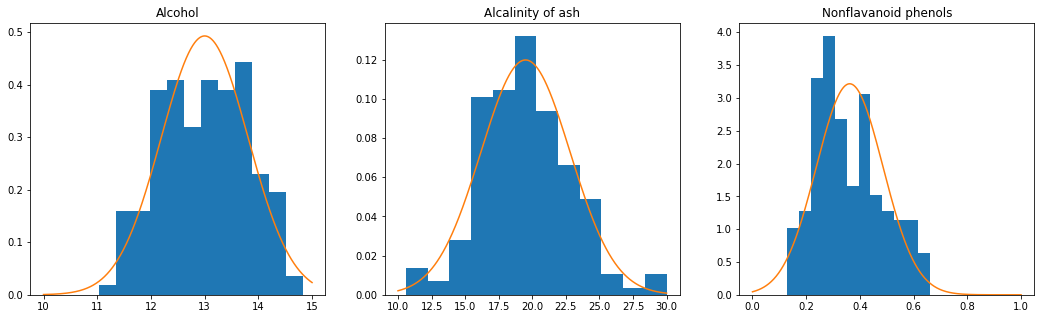

In [27]:
samples = df.values.T[[1,4,8]]
params = [
        ['Alcohol', (10, 15)],
        ['Alcalinity of ash', (10, 30)],
        ['Nonflavanoid phenols', (0, 1)]
]

plt.figure(figsize=(18,5))
for sample, label, interv, i in zip(samples, *list(map(list, zip(*params))), range(1,len(samples)+1)):
    print(label)
    size, mean, median, std, ci, kss = normal_summary(sample)
    
    plt.subplot(1, 3, i)
    plt.title(label)
    grid = np.linspace(interv[0], interv[1], 1000)
    plt.hist(sample, normed=True, bins=12)
    
    plt.plot(grid, sps.norm(loc=mean, scale=std).pdf(grid))
    
    print()
plt.show()

Первые два распределения похожи на нормальное визуально, значения статистики Колмогорова-Смирнова $0.069$ и $0.063$. У третьего же она почти в два раза больше ($0.115$), и визуально гистограмма менее похожа на нормальное распределение из-за больших перепадов высот.

**Вывод:** Критерий Колмогорова-Смирнова позволяет достоверно определить принадлежность выборки нормальному распределению даже на сравнительно небольших размерах выборки.

### 2. Байесовские методы

**Задача 7.** Пусть $X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$ и $\theta$ имеет априорное распределение Коши. Как было сказано на лекции, аналитически интеграл в знаменателе формулы Байеса посчитать не удастся. Однако, поскольку в данном случае параметр один, можно его посчитать с помощью приближенного интегрирования.

В качестве метода приближенного интегрирования можно использовать следующую можификацию известного метода Монте-Карло. В качестве оценки интеграла $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ --- некоторая плотность, можно взять величину $\sum\limits_{j=1}^k f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Сгенерируйте выборку размера 5 из стандартного нормального распределения. Посчитайте для нее $c$ --- знаменатель в формуле Байеса. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?

Нарисуйте график плотности апостериорного распределения. Посчитайте математическое ожидание по апостериорному распределению.

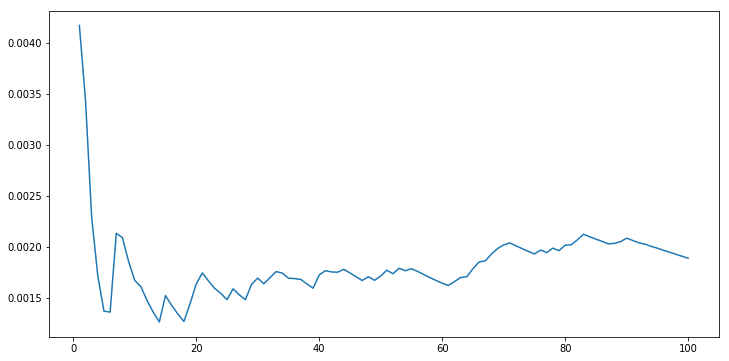

In [28]:
N = 5
sample = sps.norm.rvs(size=N)
# Правдоподобие нормального распределения
f = lambda a: 1/ (2 * np.pi) ** (len(sample) / 2) * np.exp(-1/2 * np.sum((sample - a) ** 2))
n = 100
helping_sample = sps.cauchy.rvs(size=n)
numerical_integral = np.cumsum(np.vectorize(f)(helping_sample)) / np.arange(1, n + 1)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, n + 1), numerical_integral)
# plt.ylim(0, 0.002)
plt.show()

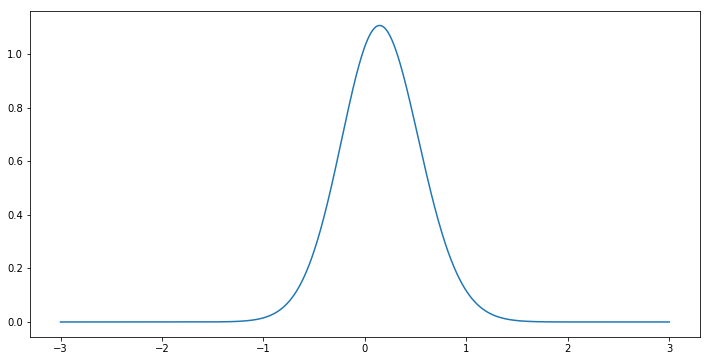

In [29]:
c = numerical_integral[-1] # Берём в качестве знаменателя наиболее точное приближение
x = np.linspace(-3, 3, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, np.vectorize(f)(x) * sps.cauchy.pdf(x) / c)
plt.show()

Найдем матожидание у распределения, имеющего апостериорную плотность: $\dfrac{f(x)p(x)}{c}$

$\mathsf{E} x = \int_{\mathbb{R}} \dfrac{xf(x)p(x)}{c} = \frac{1}{ck}\sum\limits_{i = 1}^{k} Y_i f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

In [30]:
expectation = 1 / (c * n) * np.sum(helping_sample * np.vectorize(f)(helping_sample))
print(expectation)

0.164068613726


**Вывод:** Эта модификация метода Монте-Карло, действительно, позволяет считать интегралы численно.

**Задача 8.** Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как значения параметров его соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* ничего не известно (все значения равновероятны)

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

Сопряжённым для биномиального является бета-распределение. Если $B(\alpha, \beta)$ — априорное распределение, то $B(\sum X_i+\alpha, n - \sum X_i + \beta)$ — апостериорное распределение.

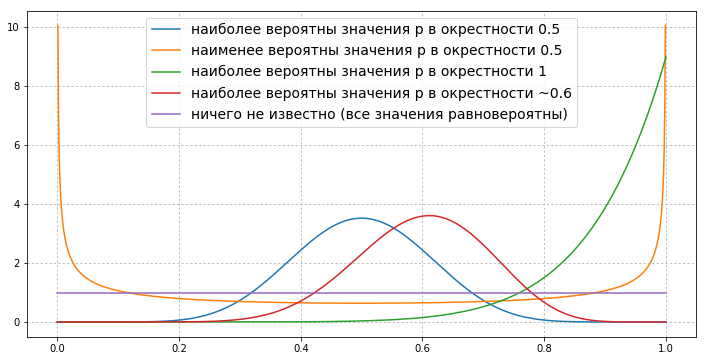

In [31]:
plt.figure(figsize=(12, 6))
grid = np.linspace(0, 1, 1000)
plt.plot(grid, sps.beta(a=10, b=10).pdf(grid), label='наиболее вероятны значения p в окрестности 0.5')
plt.plot(grid, sps.beta(a=0.5, b=0.5).pdf(grid), label='наименее вероятны значения p в окрестности 0.5')
plt.plot(grid, sps.beta(a=9, b=1).pdf(grid), label='наиболее вероятны значения p в окрестности 1')
plt.plot(grid, sps.beta(a=12, b=8).pdf(grid), label='наиболее вероятны значения p в окрестности ~0.6')
plt.plot(grid, sps.beta(a=1, b=1).pdf(grid), label='ничего не известно (все значения равновероятны)')
plt.grid(ls=':')
plt.legend(fontsize=14)
plt.show()

Ниже приведена реализация некоторых вспомогательных функций.

In [32]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [33]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array([np.array([np.sum(sample[:n]) + a, len(sample[:n]) - np.sum(sample)+b]) 
                       for n in range(len(sample)+1)])
    return params

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

In [34]:
N = 15
def draw_all(p, params):
    sample = sps.bernoulli(p).rvs(N)
    grid = np.linspace(0, 1, 1000)
    draw_posteriori(grid, sps.beta, bern_posterior_params(sample, params[0], params[1]))
    likelihood = cummean(sample)
    draw_estimations(ml=likelihood, distr_class=sps.beta, 
                     post_params=bern_posterior_params(sample, params[0], params[1]))

##### Честная монета, правильно подобранные параметры

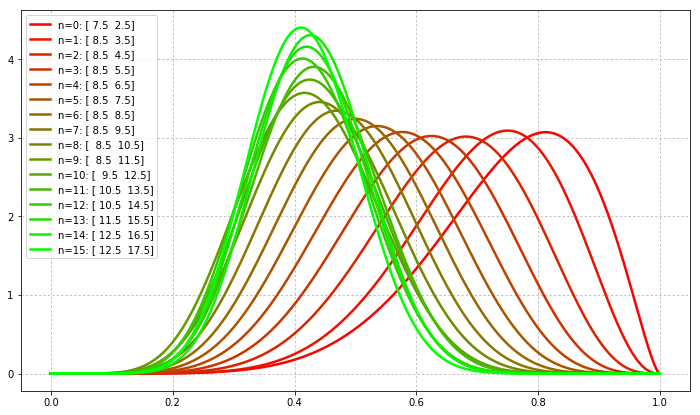

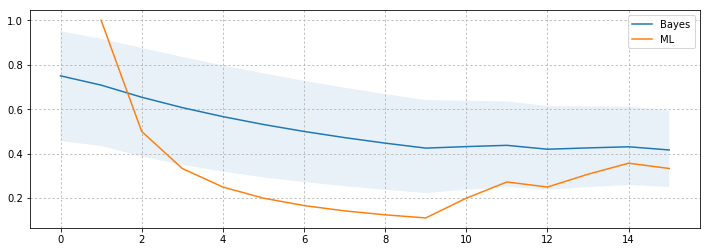

In [38]:
draw_all(0.5, (N*0.5, N*0.5))

Здесь сходимость получилась почти одинаковой (если смотреть относительно истинного значения).

##### Честная монета, неправильно подобранные параметры

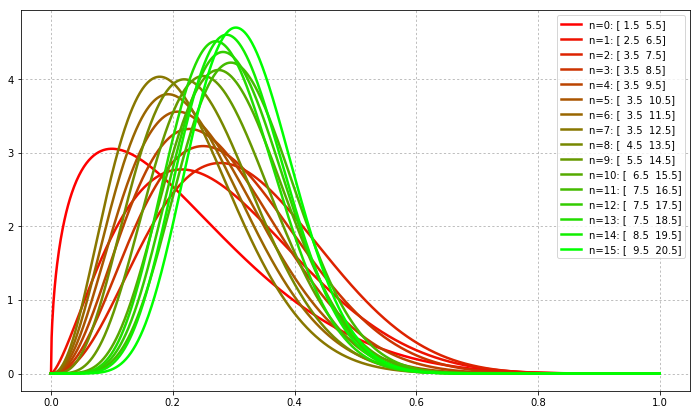

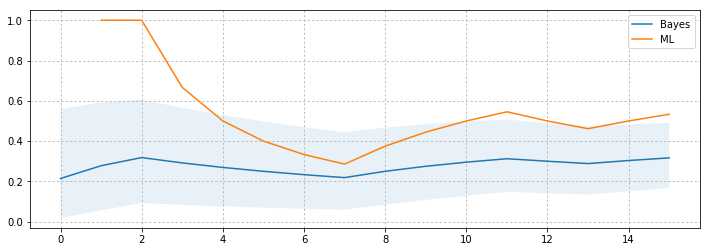

In [42]:
draw_all(0.5, (N*0.1, N*0.9))

Здесь оценка ML быстро сходится к истинному значению (но на выборке размера 15 всё равно не успевает), а байесовская оценка сходиться к 0.5 не спешит. В целом, при малых выборках байесовская лучше.

##### Нечестная монета, правильно подобранные параметры

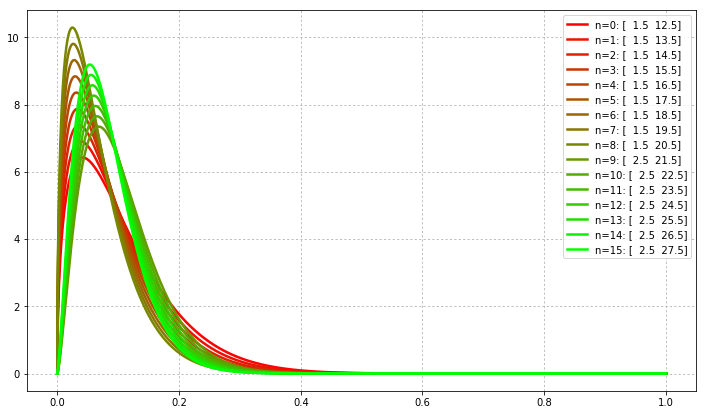

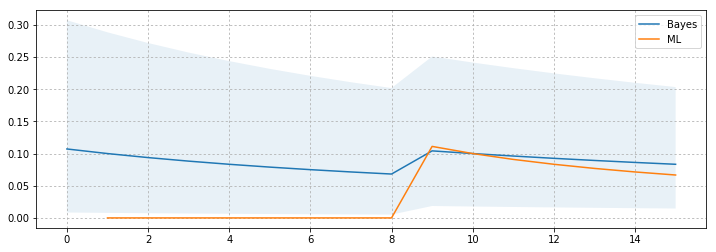

In [43]:
draw_all(0.1, (N*0.1, N*0.9))

На малых размерах выборки байесовская оценка была лучше, потом — одинаково.

Нечестная монета, неправильно подобранные параметры

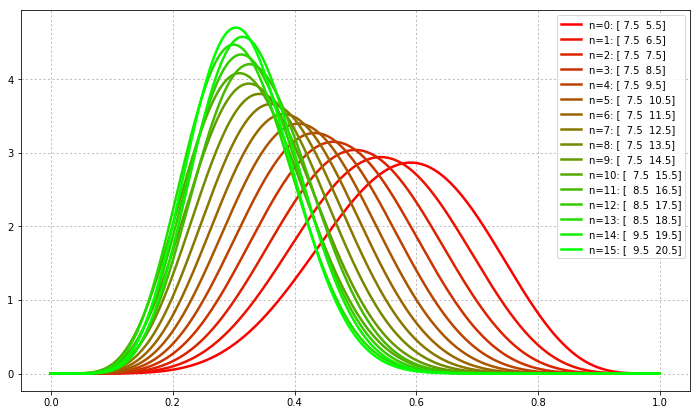

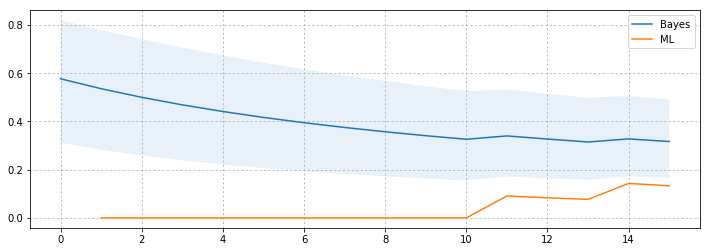

In [44]:
draw_all(0.1, (N*0.5, N*0.5))

Оценка по методу максимального правдоподобия лучше на всех рассматриваемых размерах выборки.

##### Нечестная монета, параметры подобраны совсем неправильно

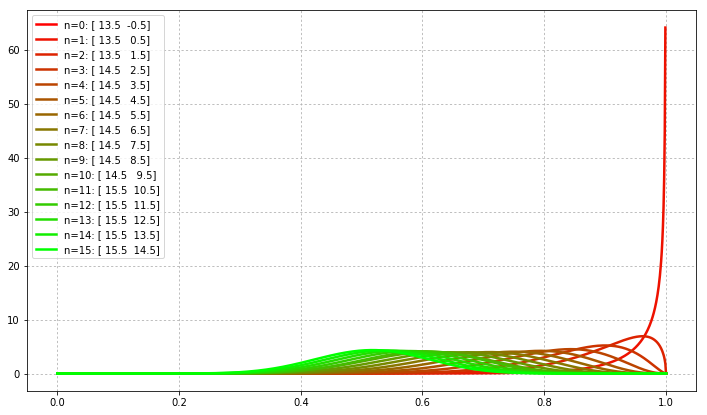

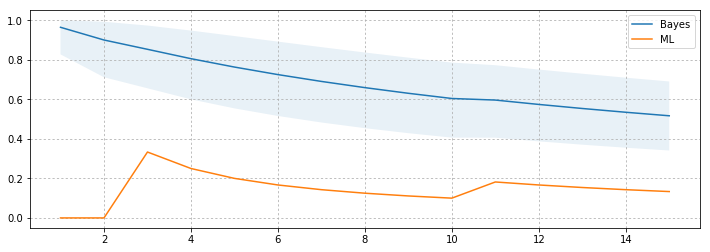

In [51]:
draw_all(0.1, (N*0.9, N*0.1))

Тут ОМП гораздо лучше байесовской.

**Вывод:** Точность байесовской оценки очень сильно зависит от угадываний параметров.

**Задача 9<font size="5" color="red">\*</font>.** 
Один экзаменатор на экзамене по теории вероятностей при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

**Задача 10.** Проведите исследование, аналогичное задаче 8 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

* $\mathcal{N}(\theta, 1)$

К $\mathcal{N}(\theta, 1)$ сопряжённым является $\mathcal{N}(a, \sigma^2)$.

Параметры апостериорного распределения $\mathcal{N}(\frac{\sigma^2 \sum x_i + a}{\sigma^2n+1}, \frac{\sigma^2}{\sigma^2n+1})$.

Возьмём $0$ за истинное значение $\theta$ (стандартное нормальное распределение).

In [52]:
def norm_posterior_params(sample, a, sigma):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array([
        np.array([(a + np.sum(sample[:n])) / (1 + n*sigma**2), sigma**2 / (1 + n*sigma**2)])
                            for n in range(len(sample)+1)])
    return params

In [53]:
N = 15
def draw_all(params):
    sample = sps.norm.rvs(size=N)
    grid = np.linspace(-5, 5, 1000)
    draw_posteriori(grid, sps.norm, norm_posterior_params(sample, params[0], params[1]))
    likelihood = cummean(sample)
    draw_estimations(ml=likelihood, distr_class=sps.norm, 
                     post_params=norm_posterior_params(sample, params[0], params[1]))

##### Параметры подобраны хорошо

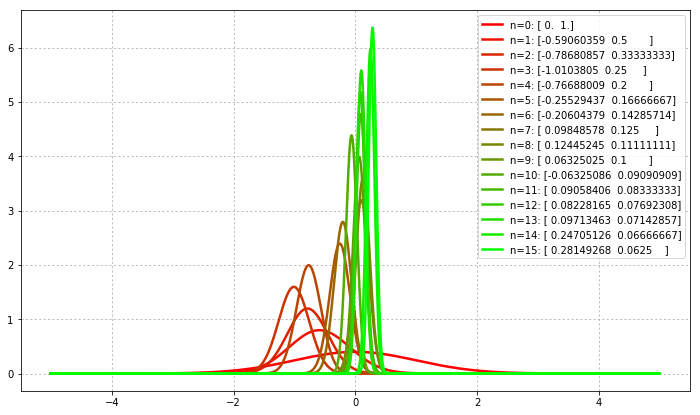

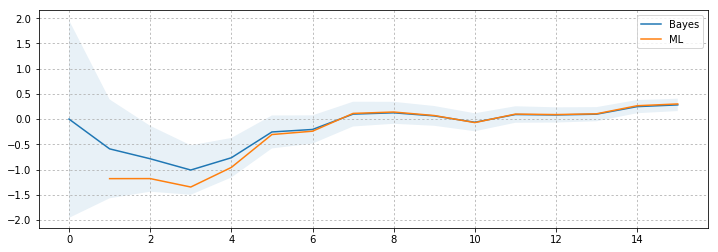

In [54]:
draw_all((0,1))

##### Параметры подобраны плохо

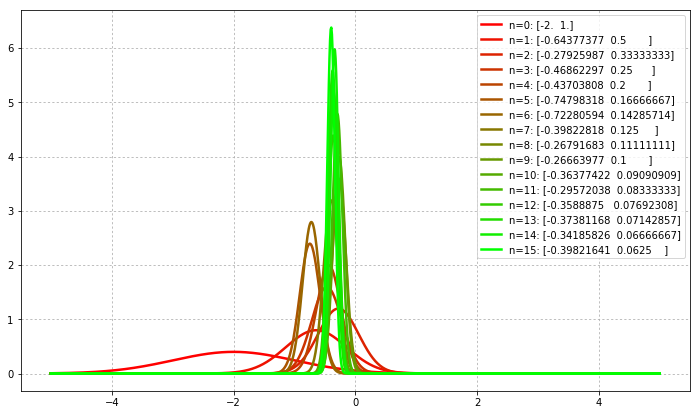

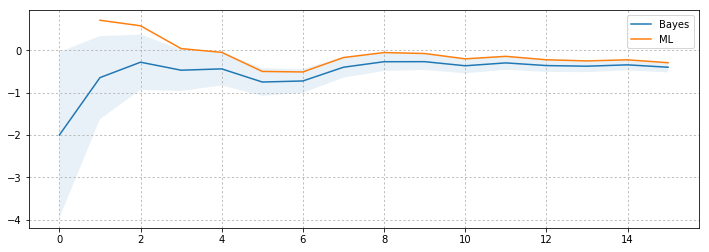

In [55]:
draw_all((-2, 1))

Для правильно угаданных параметров результат почти одинаков, для неправильно угаданных ML лучше.

* $Exp(\theta)$

К $Exp(\theta)$ сопряжённым является $\Gamma(\alpha, \beta)$.

Параметры апостериорного распределения $\Gamma(\alpha + \sum x_i, \beta + n)$

Просто так угадать параметры нельзя, но можно генерировать вспомогательную выборку с предполагаемым значением $\lambda$, потом за $\alpha$ брать сумму значений выборки, а за $\beta$ — размер выборки.

Возьмём 1 за истинное значение $\theta$ (стандартное экспоненциальное).

In [56]:
def expon_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array([np.array([b + n, 0, 1/(a + np.sum(sample[:n]))]) for n in range(len(sample)+1)])
    return params

In [57]:
N = 15
def draw_all(param):
    sample = sps.expon.rvs(size=N)
    grid = np.linspace(-5, 5, 1000)
    helping_sample = sps.expon.rvs(scale=1/param, size=N)
    draw_posteriori(grid, sps.gamma, expon_posterior_params(sample, np.sum(helping_sample), N))
    likelihood = cummean(sample)
    draw_estimations(ml=likelihood, distr_class=sps.gamma, 
                     post_params=expon_posterior_params(sample, np.sum(helping_sample), N))

##### Параметры подобраны хорошо

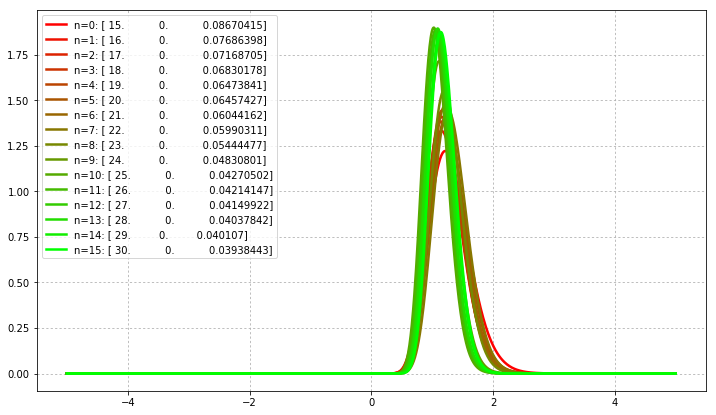

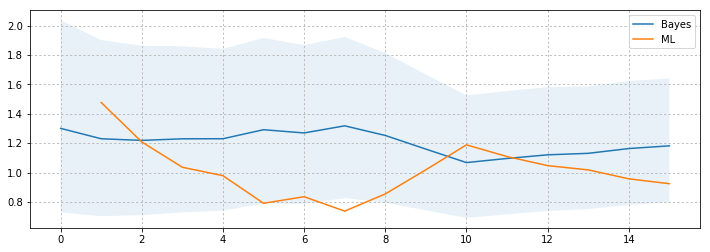

In [58]:
draw_all(1)

##### Параметры подобраны плохо

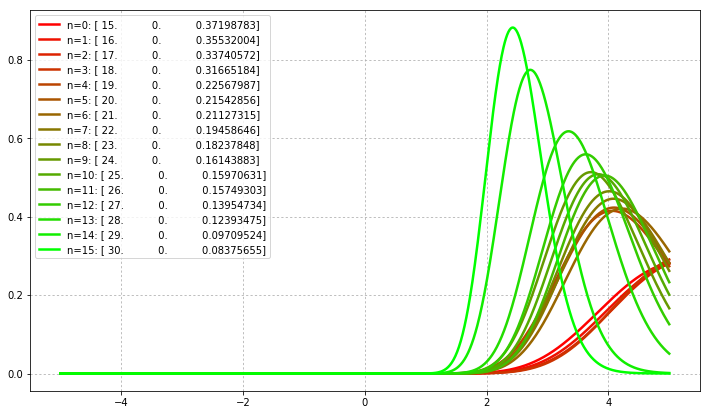

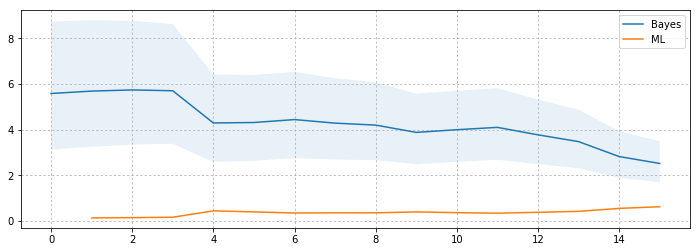

In [60]:
draw_all(5)

С правильно угаданными параметрами байесовская оценка оказалась лучше, с неправильными — ML лучше.

**Вывод:** Такой же, как в задаче 8.

**Задача 11<font size="5" color="red">\*</font>.** Проведите исследование, аналогичное задаче 8 для выборки из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$.


test

print